# Day 41 — Simple Linear Regression

On this day, I started learning about **Regression** in Machine Learning.  
As a first step, I implemented **Simple Linear Regression (SLR)** using the classic `Salary_Data.csv` dataset.

Note: I wrote and ran the actual code in **Spyder** (because it gives better coding features for ML workflows),  
but here I am documenting everything in **Jupyter Notebook** so it looks clear and can be shared.

The main goal: Predict a person’s **Salary** based on their **Years of Experience**.

---
## What is Regression?

Regression is a **supervised machine learning technique** used when we want to predict a **continuous value** (like salary, price, marks, temperature, etc.) based on one or more input features.


## Simple Linear Regression

Simple Linear Regression tries to model the relationship between one independent variable (X) and one dependent variable (y) with a straight line.

Equation:
\[
y = mx + c
\]

- **m (slope):** How much the salary increases for each extra year of experience  
- **c (intercept):** Salary when YearsExperience = 0

Example: If slope = 9500, then each extra year adds ~9.5k to the salary.

### Assumptions (just to know)
- Relationship between X and y should be roughly linear  
- Errors (residuals) should be random, with constant variance  
- Data should not have extreme outliers  
---

## Import Libraries

In [1]:
import numpy as np 	
import matplotlib.pyplot as plt
import pandas as pd	
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import variation
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
import pickle

## Load dataset

The dataset has two columns:
- **YearsExperience** → feature (X)  
- **Salary** → target (y)

We’ll load the CSV and take a quick look.

In [2]:
dataset = pd.read_csv(r"C:\Users\Arman\Downloads\dataset\Salary_Data.csv")

### Explore dataset

In [3]:
print("Dataset Shape:", dataset.shape)

Dataset Shape: (30, 2)


In [4]:
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
print("Columns:", dataset.columns)

Columns: Index(['YearsExperience', 'Salary'], dtype='object')


In [6]:
print("Missing values:\n", dataset.isnull().sum())

Missing values:
 YearsExperience    0
Salary             0
dtype: int64


## Separating independent variable x and dependent variable y
- x - Years of experience (Independent variable)
- y - Salary (Dependent variable)

In [7]:
x = dataset.iloc[:, :-1]  
y = dataset.iloc[:, -1]   

## Training the Model

Steps I followed:
1. Split dataset into **train** and **test** (80/20)  
2. Trained a Linear Regression model on the training set  
3. Made predictions on the test set  
4. Plotted results for both training and test

## Split tha Dataset into Training and Testing 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

## Train the model

In [9]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

##  Predict the test set

In [10]:
y_pred = regressor.predict(x_test)

In [11]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

## Compare Predicted and Actual salaries from the test set

In [12]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

    Actual      Predicted
2    37731   40748.961841
28  122391  122699.622956
13   57081   64961.657170
10   63218   63099.142145
26  116969  115249.562855
24  109431  107799.502753


## Visualize the Results

### Visualizing the Training set results
- Red dots: Actcual salary data from training set
- Blue line: Predicted Regression line

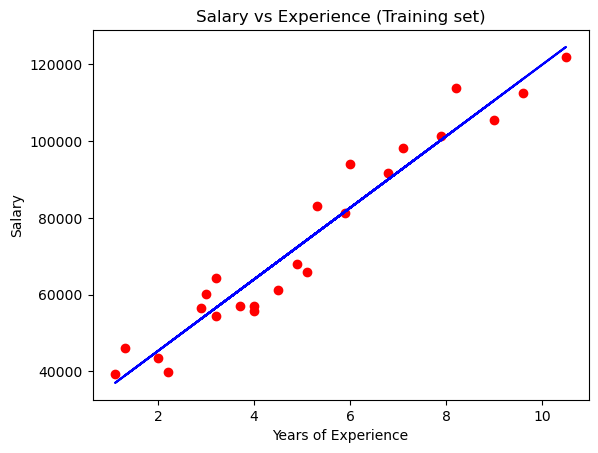

In [13]:
plt.scatter(x_train, y_train, color = 'red')  
plt.plot(x_train, regressor.predict(x_train), color = 'blue')  
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Visualizing the Test set results
- Red dots: Actucal salary data from testing set
- Blue line: Regression line from training set

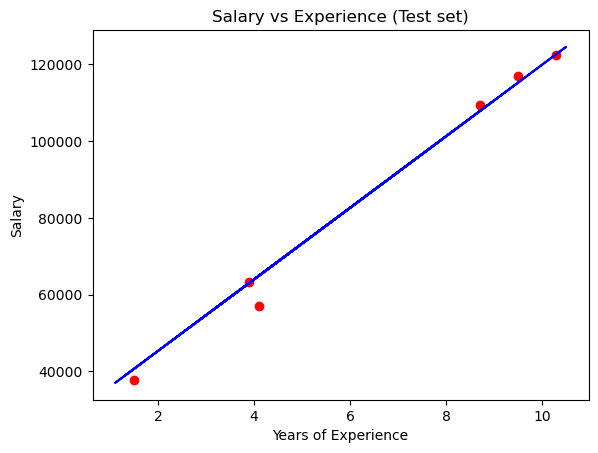

In [14]:
plt.scatter(x_test, y_test, color = 'red')  # Real salary data (testing)
plt.plot(x_train, regressor.predict(x_train), color = 'blue')  # Regression line from training set
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Interpreting Results

- **Slope (m):** tells how much salary increases with each year of experience  
- **Intercept (c):** base salary when years = 0 (may not always be meaningful)  

Predict salary for someone with 15 and 20 years of experience using the regression equation

In [15]:
m = regressor.coef_ 
print("Slope(m):", m)

Slope(m): [9312.57512673]


In [16]:
c = regressor.intercept_
print("Intercept(c):",c)

Intercept(c): 26780.099150628186


In [17]:
y_15 = (m * 15) + c
print("Predicted Salary for 15 Years of Experience:", y_15)

Predicted Salary for 15 Years of Experience: [166468.72605157]


In [18]:
y_20 = (m*20) + c
print("Predicted Salary for 20 Years of Experience:", y_20)

Predicted Salary for 20 Years of Experience: [213031.60168521]


---

## Data Exploration & Statistics

After training the model, I also explored the dataset with some statistical tools to understand it better

These checks gave me confidence that the data is clean, normally distributed enough, and suitable for applying Linear Regression.

 
### Descriptive Statistics

- **dataset.describe():** Gives summary statistics (mean, std, min, max, quartiles).  
  → Helps to understand the scale of YearsExperience and Salary.


In [19]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [20]:
dataset.mean()

YearsExperience        5.313333
Salary             76003.000000
dtype: float64

In [21]:
dataset.median()

YearsExperience        4.7
Salary             65237.0
dtype: float64

In [22]:
dataset.mode()

,YearsExperience,Salary
0,3.2,37731
1,4.0,39343
2,NaN,39891
3,NaN,43525
4,NaN,46205
5,NaN,54445
6,NaN,55794
7,NaN,56642
8,NaN,56957
9,NaN,57081


### Variance and Standard Deviation

In [23]:
dataset.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

In [24]:
dataset.std()

YearsExperience        2.837888
Salary             27414.429785
dtype: float64

### Coefficient of Variation (CV)

- **variation():** Coefficient of Variation (std ÷ mean).  
  → Shows how spread out data is relative to its average.  

In [25]:
print(variation(dataset.values))

[0.5251297  0.35463929]


In [26]:
print(variation(dataset['Salary']))

0.3546392938275572


### Correlation

- **dataset.corr():** Calculates correlation between features.  
  → Salary and YearsExperience show a strong positive correlation (more experience = higher salary).  

In [27]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [28]:
print("Salary vs Experience Correlation:",dataset['Salary'].corr(dataset['YearsExperience']))

Salary vs Experience Correlation: 0.9782416184887598


### Skewness

- **dataset.skew():** Checks skewness (symmetry of data distribution).  
  → If skewness ≈ 0 → symmetric, >0 → right-skewed, <0 → left-skewed.  

In [29]:
dataset.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

### Standard Error of Mean (SEM)

- **dataset.sem():** Standard Error of Mean, tells how reliable the mean is.  
  → A smaller SEM means the sample mean is a good estimate of the population mean.  

In [30]:
dataset.sem()

YearsExperience       0.518125
Salary             5005.167198
dtype: float64

In [31]:
print("Standard Error Mean of Salary", dataset['Salary'].sem())

Standard Error Mean of Salary 5005.167198052405


### Z-Score

- **zscore():** Standardizes values to check how far each point is from the mean (in standard deviations).  
  → Useful for detecting possible outliers. (|z| > 3 usually indicates an outlier)

In [32]:
dataset.apply(stats.zscore)

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781
5,-0.864935,-0.718307
6,-0.829096,-0.588158
7,-0.757416,-0.799817
8,-0.757416,-0.428810
9,-0.578216,-0.698013


In [33]:
print("Z-Score of Salary:\n", stats.zscore(dataset['Salary']))

Z-Score of Salary:
 [-1.36011263 -1.10552744 -1.419919   -1.20495739 -1.33978143 -0.71830716
 -0.58815781 -0.79981746 -0.42881019 -0.69801306 -0.47433279 -0.74976858
 -0.70662043 -0.70201994 -0.55250402 -0.29921736 -0.37004264  0.26285865
  0.19885989  0.66547573  0.58377993  0.82623317  0.93861127  1.40274136
  1.24020308  1.09740238  1.51986835  1.3590738   1.72102849  1.70177321]


### Degree of Freedom

In [34]:
a = dataset.shape[0]  # number of rows
b = dataset.shape[1]  # number of columns

degree_of_freedom = a - b
print("Degrees of Freedom:", degree_of_freedom)

Degrees of Freedom: 28


### Sum of Squares Regression (SSR)

In [35]:
y_mean = np.mean(y)
SSR = np.sum((y_pred-y_mean)**2)
print(SSR)

6263152884.284127


### Sum of Squares Error (SSE)

In [36]:
y = y[0:6]
SSE = np.sum((y-y_pred)**2)
print(SSE)

15274062883.9432


### Sum of Squares Total (SST)

In [37]:
mean_total = np.mean(dataset.values) # here df.to_numpy()will convert pandas Dataframe to Nump
SST = np.sum((dataset.values-mean_total)**2)
print(SST)

108429703765.82735


---

## Check model performance

After training the Simple Linear Regression model, I evaluated it with the following:

- **R² Score (score method):**  
  - On training data → how well the model explains variance in salary.  
  - On test data → how well the model generalizes to unseen data.  
  (Note: In my code I had named them `bias` and `variance`, but actually they are **R² scores**.)

- **Mean Squared Error (MSE):**  
  - Calculated separately for training and test sets.  
  - Measures average squared difference between predicted and actual values.  
  - Smaller MSE = better performance.

Together, R² and MSE give a good idea of how well the regression line fits the data.  
In this dataset, the model performs well because the relationship between experience and salary is almost perfectly linear.


### R-Square

In [38]:
r_square = 1 - SSR/SST
print(r_square)

0.9422376648947554


### Training Score

In [39]:
bias = regressor.score(x_train, y_train)
print(bias)

0.9411949620562126


### Testing Score

In [40]:
variance = regressor.score(x_test, y_test)
print(variance)

0.988169515729126


### Training MSE

In [41]:
train_mse = mean_squared_error(y_train, regressor.predict(x_train))
print(train_mse)

36149670.11816131


### Test MSE

In [42]:
test_mse = mean_squared_error(y_test, y_pred)
print(test_mse)

12823412.298126562


---
## Save the model using Pickle

Finally, I saved the trained model using **pickle** so I can load it later and use it without retraining.

In [43]:
# Save the trained model to disk
filename = 'linear_regression_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(regressor, file)
print("Model has been pickled and saved as linear_regression_model.pkl")

Model has been pickled and saved as linear_regression_model.pkl


### Confirm Save location

---

## Summary — Day 41: Simple Linear Regression

In this notebook, I:
- Learned the concept and intuition of **Simple Linear Regression (SLR)**
- Worked with the **Salary_Data** dataset (YearsExperience → Salary)
- Split the dataset into **training** and **test** sets (80/20)
- Trained the model in **Spyder** and documented the process here in Jupyter
- Visualized training and test results with regression line
- Interpreted **slope** (salary increase per year of experience) and **intercept**
- Made predictions for given years of experience (including extrapolated cases like 15 & 20 years)
- Explored **extra statistics** (describe, correlation, skewness, z-score, SEM, coefficient of variation)
- Evaluated model performance with **R² scores** and **Mean Squared Error (MSE)**
- Saved the model using **pickle** for future use

---

## Key Takeaways

- **SLR equation:** \( y = mx + c \)  
- **Slope (m):** tells how much salary changes with each year of experience  
- **Intercept (c):** base level salary when experience = 0  
- A strong **positive correlation** confirmed linearity between experience and salary  
- **R² close to 1** → excellent fit for this dataset  
- **MSE low** → predictions are close to actual values  
- Extra statistical checks (skew, z-score, SEM, CV) gave better insight into data quality  
- Saving the trained model makes it easy to reuse without retraining
